### Data Exploration and Cleaning

Importing related libraries and read the file.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
import os

drive.mount('/content/drive')
notebook_path = r"/content/drive/MyDrive/SOCIAL_MEDIA"
os.chdir(notebook_path)
!pwd

df = pd.read_csv('Job_Tweets.csv')
df.head()

Mounted at /content/drive
/content/drive/MyDrive/SOCIAL_MEDIA


,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,NaN,0,1,0,"<a href=""http://instagram.com"" rel=""nofollow"">...","20 miles SE of Taos, NM",False,3342,258
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...",Arizona,False,63,129
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,"<a href=""http://jobvite.com"" rel=""nofollow"">Jo...","Texas, USA",False,19,50
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...","Orange County, California",False,966,1569
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,"<a href=""http://www.ziprecruiter.com"" rel=""nof...",United States,False,983,1251


In [ ]:
# list all column names in the dataset
list(df.columns)

['ID',
 'Timestamp',
 'User',
 'Text',
 'Hashtag',
 'Retweets',
 'Likes',
 'Replies',
 'Source',
 'Location',
 'Verified_Account',
 'Followers',
 'Following']

In [ ]:
# to check dimensions of the dataset
print("Dimensions of the dataset:")
print("Number of rows:", df.shape[0])
print("Number of columns:", df.shape[1])

Dimensions of the dataset:
Number of rows: 50000
Number of columns: 13


In [ ]:
# to get a summary of data types and non-null values
print("Summary of data types and non-null values:")
df.info()

Summary of data types and non-null values:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                50000 non-null  int64 
 1   Timestamp         50000 non-null  object
 2   User              50000 non-null  object
 3   Text              50000 non-null  object
 4   Hashtag           40684 non-null  object
 5   Retweets          50000 non-null  int64 
 6   Likes             50000 non-null  int64 
 7   Replies           50000 non-null  int64 
 8   Source            50000 non-null  object
 9   Location          44011 non-null  object
 10  Verified_Account  50000 non-null  bool  
 11  Followers         50000 non-null  int64 
 12  Following         50000 non-null  int64 
dtypes: bool(1), int64(6), object(6)
memory usage: 4.6+ MB


In [ ]:
# convert data type of user ID from int to object
df["ID"] = df["ID"].astype(object)
df.dtypes

,0
ID,object
Timestamp,object
User,object
Text,object
Hashtag,object
Retweets,int64
Likes,int64
Replies,int64
Source,object
Location,object


In [ ]:
# convert timestamp to datetime
df['Date'] = pd.to_datetime(df['Timestamp']).dt.date
df[['Date']].head()

,Date
0,2019-12-30
1,2019-12-30
2,2019-12-30
3,2019-12-30
4,2019-12-30


In [ ]:
import re

# remove URL and HTML tags
df['Source'] = df['Source'].apply(lambda x: re.sub(r'http\S+', '', x))
df['Source'] = df['Source'].apply(lambda x: re.sub(r'<.*?>', '', x))
df[['Source']].head()

,Source
0,Instagram
1,Jobvite
2,Jobvite
3,ZipRecruiter Post Jobs
4,ZipRecruiter Post Jobs


In [ ]:
# describing categorical data
df.describe(include='object')

,ID,Timestamp,User,Text,Hashtag,Source,Location,Date
count,50000,50000,50000,50000,40684,50000,44011,50000
unique,50000,46795,13715,46507,14227,261,5973,150
top,1211798864656769025,2019-12-18 20:00:41+00:00,cameroncraig,We generally enjoy and are satisfied by being ...,"['hiring', 'jobs', 'Houston']",ZipRecruiter Post Jobs,United States,2021-12-14
freq,1,8,2513,134,792,21888,3504,781


In [ ]:
# describing numerical data
df.describe()

,Retweets,Likes,Replies,Followers,Following
count,50000.000000,50000.000000,50000.000000,5.000000e+04,50000.000000
mean,0.692100,1.347860,0.108920,5.511382e+03,1961.965460
std,7.441484,17.527216,1.276483,6.770825e+04,5847.789338
min,0.000000,0.000000,0.000000,0.000000e+00,0.000000
25%,0.000000,0.000000,0.000000,8.000000e+01,94.000000
50%,0.000000,0.000000,0.000000,2.980000e+02,331.000000
75%,0.000000,0.000000,0.000000,1.258000e+03,1076.000000
max,1016.000000,1677.000000,175.000000,5.226473e+06,310791.000000


In [ ]:
# to check for any missing values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID                     0
Timestamp              0
User                   0
Text                   0
Hashtag             9316
Retweets               0
Likes                  0
Replies                0
Source                 0
Location            5989
Verified_Account       0
Followers              0
Following              0
Date                   0
dtype: int64


In [ ]:
df["Hashtag"].fillna("[ ]", inplace = True)
df["Location"].fillna("No Location", inplace = True)

missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

Missing Values:
ID                  0
Timestamp           0
User                0
Text                0
Hashtag             0
Retweets            0
Likes               0
Replies             0
Source              0
Location            0
Verified_Account    0
Followers           0
Following           0
Date                0
dtype: int64


<ipython-input-12-f7a0cd562d77>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Hashtag"].fillna("[ ]", inplace = True)
<ipython-input-12-f7a0cd562d77>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df

In [ ]:
# to count the number of duplicated rows
duplicate_rows = df.duplicated()
num_duplicates = sum(duplicate_rows)
print(num_duplicates)

0


In [ ]:
df.head()

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Date
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,[ ],0,1,0,Instagram,"20 miles SE of Taos, NM",False,3342,258,2019-12-30
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,Jobvite,Arizona,False,63,129,2019-12-30
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,Jobvite,"Texas, USA",False,19,50,2019-12-30
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,ZipRecruiter Post Jobs,"Orange County, California",False,966,1569,2019-12-30
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,ZipRecruiter Post Jobs,United States,False,983,1251,2019-12-30


<br>

###Test Preprocessing

DATA PREPROCESSING FOR TEXT: <br>
1. Noise Reduction --> remove noise such as punctuation, special characters, and irrelevant symbols
2. Normalization --> standardize variations for different form of words that can convey same meaning
3. Tokenization --> broken down text data into smaller units such as words or phrases
4. Stopword Removal --> removal stopword such as "the", "is", "and"
5. Feature Selection -->  extracting features from text for building machine learning models
6. Dimensionality Reduction --> transformation of text data from a high-dimensional space into a low-dimensional space

In [ ]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import TruncatedSVD

In [ ]:
nltk.data.path.append("C:\\nltk_data")  # Manually set the NLTK data path
nltk.download('stopwords', download_dir="C:\\nltk_data")
nltk.download('punkt', download_dir="C:\\nltk_data")
nltk.download('wordnet', download_dir="C:\\nltk_data")

[nltk_data] Downloading package stopwords to C:\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
# Download necessary NLTK resources
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('punkt_tab')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [ ]:
# 1. Noise Reduction
def remove_noise(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove special characters, punctuation
    return text

In [ ]:
# 2. Normalization: Lowercasing & Lemmatization
lemmatizer = WordNetLemmatizer()
def normalize_text(text):
    text = text.lower()  # Convert to lowercase
    words = nltk.word_tokenize(text)  # Tokenize
    words = [lemmatizer.lemmatize(word) for word in words]  # Lemmatize words
    return ' '.join(words)

In [ ]:
# 3. Tokenization (Already integrated in Normalization)
def tokenize_text(text):
    return nltk.word_tokenize(text)

In [ ]:
# 4. Stopword Removal
stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    words = nltk.word_tokenize(text)
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [ ]:
# Apply Preprocessing to the Dataset
def preprocess_text(text):
    text = remove_noise(text)
    text = normalize_text(text)
    text = remove_stopwords(text)
    return text

# Apply all preprocessing steps to the 'text' column (adjust column name if needed)
df['cleaned_text'] = df['Text'].apply(preprocess_text)  # Replace with your column name
df[['Text', 'cleaned_text']].head()

,Text,cleaned_text
0,Looking for an exciting job where you can ski ...,looking exciting job ski free ski area still h...
1,Hail in Phoenix - no way! New opportunity at ...,hail phoenix way new opportunity freedom possi...
2,Rackspace is hiring! We are looking for Nation...,rackspace hiring looking national partner mana...
3,We are #hiring Administrative Assistant in Nan...,hiring administrative assistant nanuet ny http...
4,We are #hiring Family Service Counselor in Irv...,hiring family service counselor irvine ca http...


In [ ]:
# Save the specified columns into a CSV file
df[['Text', 'cleaned_text']].to_csv('text_and_cleaned_text.csv', index=False)

print("File saved as 'text_and_cleaned_text.csv'")

File saved as 'text_and_cleaned_text.csv'


In [ ]:
# 5. Feature Selection: Convert text to numerical features
vectorizer = TfidfVectorizer(max_features=500)  # Limit to top 500 features
tfidf_features = vectorizer.fit_transform(df['cleaned_text'])
print("TF-IDF feature extraction complete. Shape:", tfidf_features.shape)

TF-IDF feature extraction complete. Shape: (50000, 500)


In [ ]:
# 6. Dimensionality Reduction using TruncatedSVD
svd = TruncatedSVD(n_components=100)  # Reduce to 100 dimensions
reduced_features = svd.fit_transform(tfidf_features)
print("Dimensionality Reduction complete. Shape:", reduced_features.shape)

Dimensionality Reduction complete. Shape: (50000, 100)


In [ ]:
# Final preprocessed dataframe
df_features = pd.DataFrame(reduced_features, columns=[f'component_{i}' for i in range(1, 101)])
print("\nFinal reduced features:")
df_features.head()


Final reduced features:


,component_1,component_2,component_3,component_4,component_5,component_6,component_7,component_8,component_9,component_10,...,component_91,component_92,component_93,component_94,component_95,component_96,component_97,component_98,component_99,component_100
0,0.103900,-0.107554,-0.104720,0.003526,0.016652,0.024773,-0.002633,-0.006034,0.010908,0.019021,...,-0.048983,-0.039347,0.041687,-0.038369,-0.005905,0.016081,-0.006875,0.017212,-0.006084,0.013585
1,0.095168,-0.123122,-0.100342,-0.014659,0.004424,-0.024756,-0.045618,0.011107,0.315177,0.028546,...,0.017581,-0.006363,-0.005606,0.036634,-0.006332,-0.024078,-0.019364,0.010127,0.005749,-0.005620
2,0.142683,-0.175146,-0.032683,0.144699,0.128904,0.024650,0.008671,0.000036,-0.031434,0.073489,...,-0.118378,-0.049889,0.084559,-0.065933,0.011694,0.084464,-0.013489,-0.000627,0.005770,-0.012790
3,0.141298,-0.182258,0.141017,0.082335,0.015767,0.061355,-0.160551,0.047139,0.376419,-0.240682,...,0.023051,0.006885,-0.020787,-0.033190,0.062032,0.040770,-0.014974,0.011297,-0.037284,0.025733
4,0.077854,-0.103125,0.074733,-0.005293,-0.123509,0.076013,0.217901,-0.101157,0.022623,0.001119,...,-0.020543,0.028291,0.023027,-0.003386,0.009619,-0.003429,-0.000716,-0.042209,0.025274,-0.009547


In [ ]:
# Make a copy
cleaned_df = df.copy()
cleaned_df.head()

,ID,Timestamp,User,Text,Hashtag,Retweets,Likes,Replies,Source,Location,Verified_Account,Followers,Following,Date,cleaned_text
0,1211798864656769025,2019-12-30 23:58:58+00:00,SipapuNM,Looking for an exciting job where you can ski ...,[ ],0,1,0,Instagram,"20 miles SE of Taos, NM",False,3342,258,2019-12-30,looking exciting job ski free ski area still h...
1,1211797371853705220,2019-12-30 23:53:02+00:00,LorettaOD1,Hail in Phoenix - no way! New opportunity at ...,['job'],0,0,0,Jobvite,Arizona,False,63,129,2019-12-30,hail phoenix way new opportunity freedom possi...
2,1211795775363145728,2019-12-30 23:46:41+00:00,guajardo_celina,Rackspace is hiring! We are looking for Nation...,"['becomearacker', 'Rackspace', 'recruiting', '...",0,0,0,Jobvite,"Texas, USA",False,19,50,2019-12-30,rackspace hiring looking national partner mana...
3,1211793355060981767,2019-12-30 23:37:04+00:00,SteveEckert_OTD,We are #hiring Administrative Assistant in Nan...,"['hiring', 'jobs', 'Nanuet']",0,0,0,ZipRecruiter Post Jobs,"Orange County, California",False,966,1569,2019-12-30,hiring administrative assistant nanuet ny http...
4,1211792689022349315,2019-12-30 23:34:25+00:00,HireLive,We are #hiring Family Service Counselor in Irv...,"['hiring', 'jobs', 'Irvine']",0,0,0,ZipRecruiter Post Jobs,United States,False,983,1251,2019-12-30,hiring family service counselor irvine ca http...


### Data Labeling

Install and import related libraries

In [ ]:
#pip install textblob
!pip install vaderSentiment
!pip install flair

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 32.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 56.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 202.6/202.6 kB 18.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 86.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.2/84.2 kB 6.6 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993222 sha256=0531120606d370672298b6b

In [ ]:
# Define the folder path for saving sentiment files
folder_path = "sentiment_analysis"

# Create the folder if it doesn't exist
os.makedirs(folder_path, exist_ok=True)

Installations are successful. Now, let's proceed to do sentiment analysis using TextBlob.

In [ ]:
import torch
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from flair.models import TextClassifier
from flair.data import Sentence

In [ ]:
#selecting column 'Text' to do sentiment analysis and display in DataFrame
df_text = pd.DataFrame(cleaned_df['cleaned_text'])
df_text.head()

,cleaned_text
0,looking exciting job ski free ski area still h...
1,hail phoenix way new opportunity freedom possi...
2,rackspace hiring looking national partner mana...
3,hiring administrative assistant nanuet ny http...
4,hiring family service counselor irvine ca http...


<br>

In [ ]:
# Applying TextBlob
cleaned_df['text_blob'] = cleaned_df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment)
cleaned_df[['text_blob', 'cleaned_text']].head()

,text_blob,cleaned_text
0,"(0.35, 0.8)",looking exciting job ski free ski area still h...
1,"(0.06818181818181818, 0.7272727272727273)",hail phoenix way new opportunity freedom possi...
2,"(0.0, 0.0)",rackspace hiring looking national partner mana...
3,"(0.0, 0.0)",hiring administrative assistant nanuet ny http...
4,"(0.0, 0.0)",hiring family service counselor irvine ca http...


<br> Let's do sentiment analysis using Vader.

In [ ]:
# Applying Vader
analyzer = SentimentIntensityAnalyzer()
cleaned_df['text_vader'] = cleaned_df['cleaned_text'].apply(lambda x: analyzer.polarity_scores(x))
cleaned_df[['text_vader', 'cleaned_text']].head()

,text_vader,cleaned_text
0,"{'neg': 0.0, 'neu': 0.649, 'pos': 0.351, 'comp...",looking exciting job ski free ski area still h...
1,"{'neg': 0.0, 'neu': 0.526, 'pos': 0.474, 'comp...",hail phoenix way new opportunity freedom possi...
2,"{'neg': 0.0, 'neu': 0.824, 'pos': 0.176, 'comp...",rackspace hiring looking national partner mana...
3,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",hiring administrative assistant nanuet ny http...
4,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",hiring family service counselor irvine ca http...


Let's do sentiment analysis using flair.

In [ ]:
# Applying flair
classifier = TextClassifier.load('en-sentiment')
sentences = [Sentence(text) for text in cleaned_df['cleaned_text']]
classifier.predict(sentences)
cleaned_df['text_flair'] = [sentence.labels[0].value for sentence in sentences]
cleaned_df[['text_flair', 'cleaned_text']].head()

2025-01-29 16:28:42,836 https://nlp.informatik.hu-berlin.de/resources/models/sentiment-curated-distilbert/sentiment-en-mix-distillbert_4.pt not found in cache, downloading to /tmp/tmpzs1570p1


100%|██████████| 253M/253M [00:12<00:00, 21.1MB/s]

2025-01-29 16:28:55,542 copying /tmp/tmpzs1570p1 to cache at /root/.flair/models/sentiment-en-mix-distillbert_4.pt


2025-01-29 16:28:56,656 removing temp file /tmp/tmpzs1570p1


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

,text_flair,cleaned_text
0,POSITIVE,looking exciting job ski free ski area still h...
1,NEGATIVE,hail phoenix way new opportunity freedom possi...
2,POSITIVE,rackspace hiring looking national partner mana...
3,POSITIVE,hiring administrative assistant nanuet ny http...
4,POSITIVE,hiring family service counselor irvine ca http...


<br>

###Data Visualization

Let's apply visualization for TextBlob.

In [ ]:
# Applying visualization for TextBlob
cleaned_df['text_blob_polarity'] = cleaned_df['text_blob'].apply(lambda x: 'Positive' if x.polarity > 0 else ('Negative' if x.polarity < 0 else 'Neutral'))
cleaned_df[['text_blob_polarity', 'cleaned_text']].head()

,text_blob_polarity,cleaned_text
0,Positive,looking exciting job ski free ski area still h...
1,Positive,hail phoenix way new opportunity freedom possi...
2,Neutral,rackspace hiring looking national partner mana...
3,Neutral,hiring administrative assistant nanuet ny http...
4,Neutral,hiring family service counselor irvine ca http...


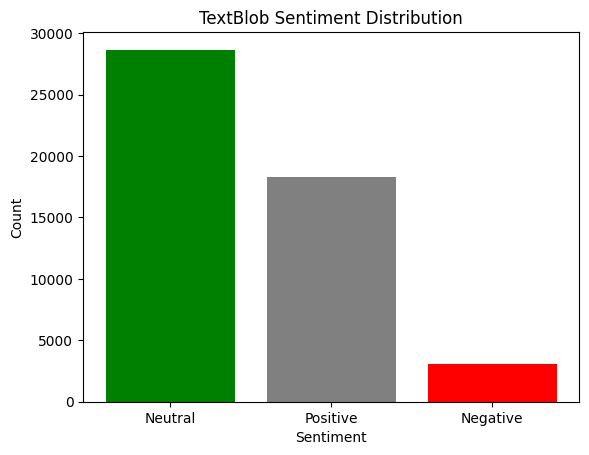

In [ ]:
sentiment_counts = cleaned_df['text_blob_polarity'].value_counts()

plt.bar(sentiment_counts.index, sentiment_counts.values, color=['green', 'gray', 'red'])
plt.title('TextBlob Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

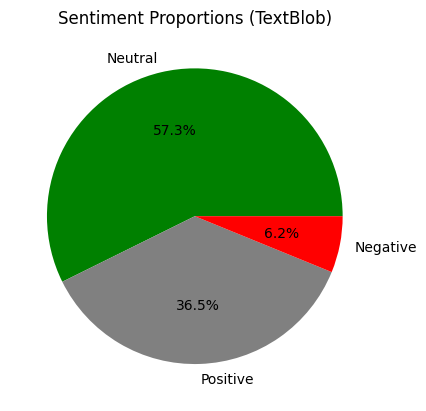

In [ ]:
sentiment_counts = cleaned_df['text_blob_polarity'].value_counts()

plt.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%', colors=['green', 'gray', 'red'])
plt.title('Sentiment Proportions (TextBlob)')
plt.show()

In [ ]:
# Count TextBlob sentiment
count_blob = cleaned_df['text_blob_polarity'].value_counts()
count_blob

,count
text_blob_polarity,
Neutral,28657
Positive,18259
Negative,3084


<br>

Displaying texts based on categories

In [ ]:
# Filter rows where text_blob_polarity is 'POSITIVE'
positive_texts_blob = cleaned_df[cleaned_df['text_blob_polarity'] == 'Positive']['cleaned_text']

# Display the result
print(positive_texts_blob.head())

0     looking exciting job ski free ski area still h...
1     hail phoenix way new opportunity freedom possi...
10    looking hire full time baristasupervisor conta...
11    briansnewheart doesnt kill job store checkout ...
14    hiring experienced frontend developer join agi...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "positive_texts_blob.csv")
positive_texts_blob.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/positive_texts_blob.csv


In [ ]:
# Filter rows where text_blob_polarity is 'NEGATIVE'
negative_texts_blob = cleaned_df[cleaned_df['text_blob_polarity'] == 'Negative']['cleaned_text']

# Display the result
print(negative_texts_blob.head())

78     hiring physical therapist assistant snf lake p...
89     hiring sale recruiteroffice manager white plai...
93     hiring restaurant manager full service casual ...
101    hiring warehouse associate cold storage ltgt h...
110    remote prescribing pharmacist work home united...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "negative_texts_blob.csv")
negative_texts_blob.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/negative_texts_blob.csv


In [ ]:
# Filter rows where text_blob_polarity is 'NEUTRAL'
neutral_texts_blob = cleaned_df[cleaned_df['text_blob_polarity'] == 'Neutral']['cleaned_text']

# Display the result
print(neutral_texts_blob.head())

2    rackspace hiring looking national partner mana...
3    hiring administrative assistant nanuet ny http...
4    hiring family service counselor irvine ca http...
5    hiring inside sale representative irvine ca ht...
6    hiring community service counselor irvine ca h...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "neutral_texts_blob.csv")
neutral_texts_blob.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/neutral_texts_blob.csv


<br>

Let's apply visualization for Vader.

In [ ]:
# Applying visualization for Vader
# Split the VADER sentiment dictionary into individual columns
df_vader = pd.json_normalize(cleaned_df['text_vader'])
cleaned_df = pd.concat([cleaned_df, df_vader], axis=1)

In [ ]:
def classify_sentiment(compound):
    if compound >= 0.05:
        return 'Positive'
    elif compound <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

cleaned_df['overall_sentiment'] = cleaned_df['compound'].apply(classify_sentiment)
cleaned_df[['cleaned_text', 'neu', 'pos', 'neg', 'compound', 'overall_sentiment']].head()

,cleaned_text,neu,pos,neg,compound,overall_sentiment
0,looking exciting job ski free ski area still h...,0.649,0.351,0.0,0.7579,Positive
1,hail phoenix way new opportunity freedom possi...,0.526,0.474,0.0,0.8689,Positive
2,rackspace hiring looking national partner mana...,0.824,0.176,0.0,0.4939,Positive
3,hiring administrative assistant nanuet ny http...,1.000,0.000,0.0,0.0000,Neutral
4,hiring family service counselor irvine ca http...,1.000,0.000,0.0,0.0000,Neutral


<ipython-input-43-6d13b2b52da2>:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='overall_sentiment', data=cleaned_df, palette='viridis')


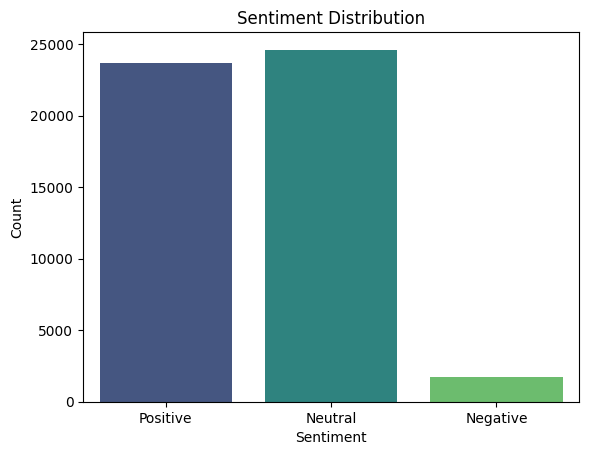

In [ ]:
sns.countplot(x='overall_sentiment', data=cleaned_df, palette='viridis')
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

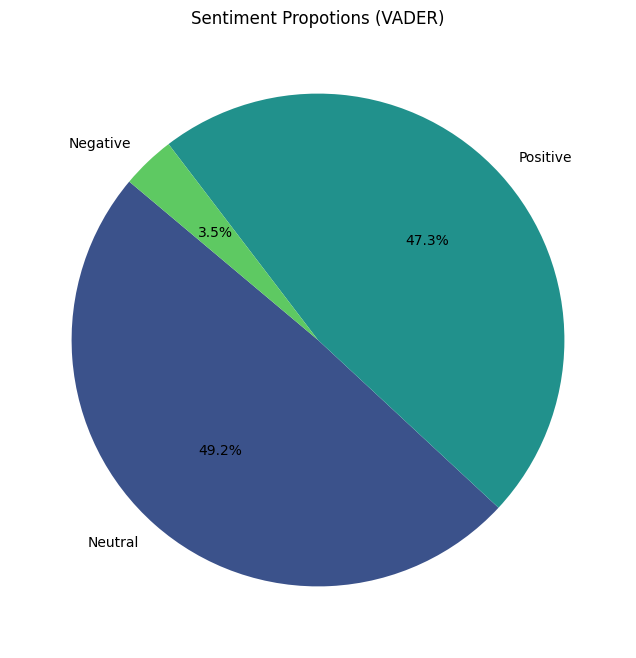

In [ ]:
sentiment_counts = cleaned_df['overall_sentiment'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(
    sentiment_counts,
    labels=sentiment_counts.index,
    autopct='%1.1f%%',
    colors=sns.color_palette('viridis', len(sentiment_counts)),
    startangle=140
)
plt.title('Sentiment Propotions (VADER)')
plt.show()


In [ ]:
# Count Vader sentiment
count_vader = cleaned_df['overall_sentiment'].value_counts()
count_vader

,count
overall_sentiment,
Neutral,24598
Positive,23644
Negative,1758


<br>

Displaying texts based on categories

In [ ]:
# Filter rows where overall_sentiment is 'POSITIVE'
positive_texts_vader = cleaned_df[cleaned_df['overall_sentiment'] == 'Positive']['cleaned_text']

# Display the result
print(positive_texts_vader.head())

0     looking exciting job ski free ski area still h...
1     hail phoenix way new opportunity freedom possi...
2     rackspace hiring looking national partner mana...
10    looking hire full time baristasupervisor conta...
11    briansnewheart doesnt kill job store checkout ...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "positive_texts_vader.csv")
positive_texts_vader.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/positive_texts_vader.csv


In [ ]:
# Filter rows where overall_sentiment is 'NEGATIVE'
negative_texts_vader = cleaned_df[cleaned_df['overall_sentiment'] == 'Negative']['cleaned_text']

# Display the result
print(negative_texts_vader.head())

194    hiring claim adjuster property amp casualty sa...
396    hiring sr fire protection engineer pasadena ca...
490    hiring looking php developer location hyderaba...
555    new year new job new hiring experienced bathro...
604    hiring rn registered nurse emergency departmen...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "negative_texts_vader.csv")
negative_texts_vader.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/negative_texts_vader.csv


In [ ]:
# Filter rows where overall_sentiment is 'NEUTRAL'
neutral_texts_vader = cleaned_df[cleaned_df['overall_sentiment'] == 'Neutral']['cleaned_text']

# Display the result
print(neutral_texts_vader.head())

3    hiring administrative assistant nanuet ny http...
4    hiring family service counselor irvine ca http...
5    hiring inside sale representative irvine ca ht...
6    hiring community service counselor irvine ca h...
7    hiring outside sale representative irvine ca h...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "neutral_texts_vader.csv")
neutral_texts_vader.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/neutral_texts_vader.csv


<br>

Let's apply visualization for Flair.

<ipython-input-49-7a867a0d0148>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')


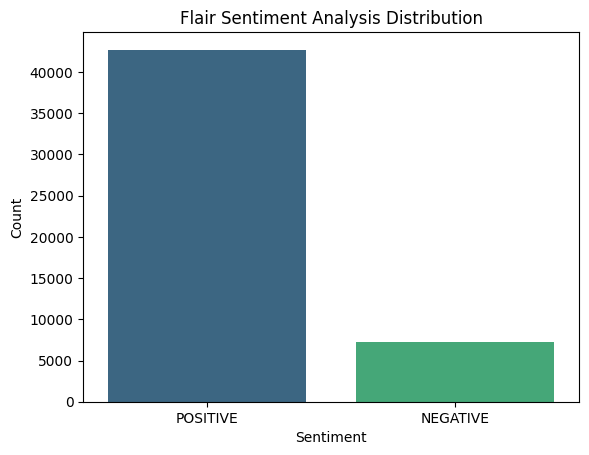

In [ ]:
# Applying visuallization for Flair
sentiment_counts = cleaned_df['text_flair'].value_counts()

sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Flair Sentiment Analysis Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

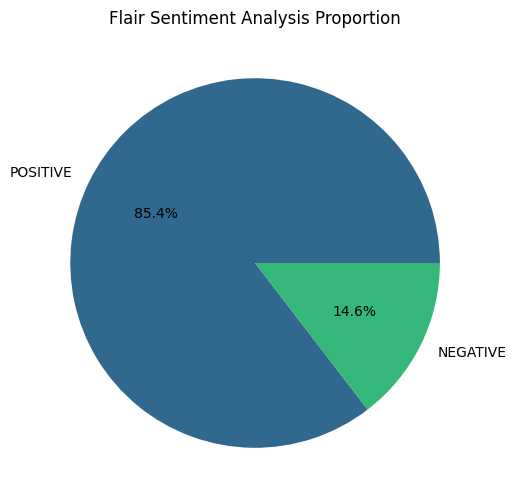

In [ ]:
plt.figure(figsize=(6, 6))
plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', colors=sns.color_palette('viridis', len(sentiment_counts)))
plt.title('Flair Sentiment Analysis Proportion')
plt.show()

In [ ]:
# Count flair sentiment
count_flair = cleaned_df['text_flair'].value_counts()
count_flair

,count
text_flair,
POSITIVE,42711
NEGATIVE,7289


<br>

Display texts based on categories

In [ ]:
# Filter rows where text_flair is 'POSITIVE'
positive_texts_flair = cleaned_df[cleaned_df['text_flair'] == 'POSITIVE']['cleaned_text']

# Display the result
print(positive_texts_flair.head())

0    looking exciting job ski free ski area still h...
2    rackspace hiring looking national partner mana...
3    hiring administrative assistant nanuet ny http...
4    hiring family service counselor irvine ca http...
5    hiring inside sale representative irvine ca ht...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "positive_texts_flair.csv")
positive_texts_flair.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/positive_texts_flair.csv


In [ ]:
# Filter rows where text_flair is 'NEGATIVE'
negative_texts_flair = cleaned_df[cleaned_df['text_flair'] == 'NEGATIVE']['cleaned_text']

# Display the result
print(negative_texts_flair.head())

1      hail phoenix way new opportunity freedom possi...
10     looking hire full time baristasupervisor conta...
17     hail phoenix way new opportunity freedom possi...
62     hiring system developer king prussia pa httpst...
118    hail phoenix way new opportunity freedom possi...
Name: cleaned_text, dtype: object


In [ ]:
file_path_csv = os.path.join(folder_path, "negative_texts_flair.csv")
negative_texts_flair.to_csv(file_path_csv, index=False)

print(f"CSV file saved at: {file_path_csv}")

CSV file saved at: sentiment_analysis/negative_texts_flair.csv


<br>

## Evaluation Testing

1. Define Ground Truth for `True_Sentiment`

In [ ]:
# Example list of keywords
positive_keywords = ['good', 'love', 'excellent', 'great', 'amazing', 'awesome']
negative_keywords = ['bad', 'hate', 'worst', 'terrible', 'awful', 'poor']
neutral_keywords = ['okay', 'fine', 'average', 'neutral', 'decent']

# Function to assign sentiment based on keywords
def assign_sentiment(text):
    text = text.lower()  # Convert text to lowercase for matching

    # Check for positive keywords
    if any(keyword in text for keyword in positive_keywords):
        return 'Positive'

    # Check for negative keywords
    elif any(keyword in text for keyword in negative_keywords):
        return 'Negative'

    # If no strong sentiment, classify as Neutral
    else:
        return 'Neutral'

# Assuming cleaned_df has a 'cleaned_text' column
cleaned_df['True_Sentiment'] = cleaned_df['cleaned_text'].apply(assign_sentiment)

# Display the first few rows to verify
cleaned_df[['cleaned_text', 'True_Sentiment']].head()

,cleaned_text,True_Sentiment
0,looking exciting job ski free ski area still h...,Neutral
1,hail phoenix way new opportunity freedom possi...,Neutral
2,rackspace hiring looking national partner mana...,Neutral
3,hiring administrative assistant nanuet ny http...,Neutral
4,hiring family service counselor irvine ca http...,Neutral


In [ ]:
# Count groudtruth sentiment
count_gt = cleaned_df[['True_Sentiment']].value_counts()
count_gt

,count
True_Sentiment,
Neutral,46738
Positive,2903
Negative,359


2. Calculate evaluation metrics

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluate the model with the appropriate labels
def evaluate_model(pred_column, true_column='True_Sentiment'):
    print(f"Evaluation for {pred_column}:")

    if pred_column == 'text_flair':
        labels = ['Positive', 'Negative']
        target_names = ['Positive', 'Negative']
    else:
        labels = ['Positive', 'Neutral', 'Negative']
        target_names = ['Positive', 'Neutral', 'Negative']

    # Accuracy
    accuracy = accuracy_score(cleaned_df[true_column], cleaned_df[pred_column])
    print("\nAccuracy:", accuracy)

    # Classification Report
    print("\nClassification Report:")
    print(classification_report(cleaned_df[true_column], cleaned_df[pred_column], target_names=target_names, labels=labels))

    # Confusion Matrix
    cm = confusion_matrix(cleaned_df[true_column], cleaned_df[pred_column], labels=labels)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title(f"Confusion Matrix for {pred_column}")
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.show()

Evaluation for text_blob_polarity:

Accuracy: 0.62502

Classification Report:
              precision    recall  f1-score   support

    Positive       0.15      0.95      0.26      2903
     Neutral       0.99      0.61      0.75     46738
    Negative       0.03      0.24      0.05       359

    accuracy                           0.63     50000
   macro avg       0.39      0.60      0.35     50000
weighted avg       0.94      0.63      0.72     50000



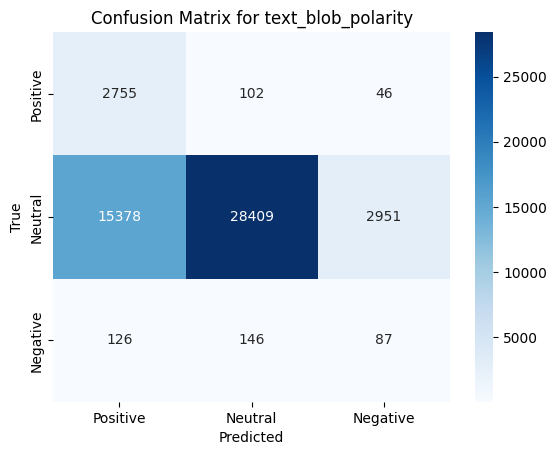

In [ ]:
# TextBlob Evaluation
evaluate_model('text_blob_polarity')

In [ ]:
cm_textblob = confusion_matrix(cleaned_df["True_Sentiment"], cleaned_df["text_blob_polarity"], labels=['Positive', 'Neutral', 'Negative'])
print("confusion matrix for Textblob\n", cm_textblob)

confusion matrix for Textblob
 [[ 2755   102    46]
 [15378 28409  2951]
 [  126   146    87]]


Evaluation for overall_sentiment:

Accuracy: 0.5438

Classification Report:
              precision    recall  f1-score   support

    Positive       0.12      0.94      0.21      2903
     Neutral       0.99      0.52      0.68     46738
    Negative       0.04      0.17      0.06       359

    accuracy                           0.54     50000
   macro avg       0.38      0.54      0.32     50000
weighted avg       0.93      0.54      0.65     50000



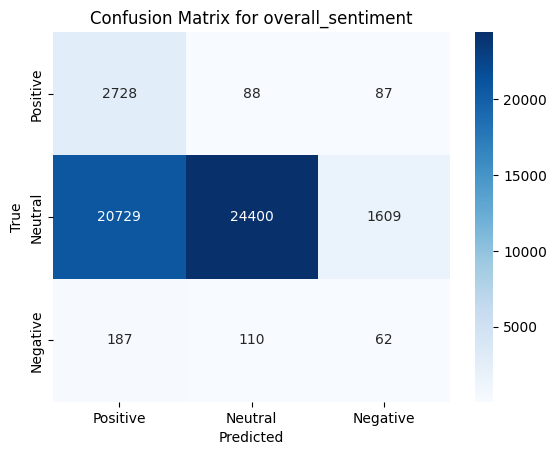

In [ ]:
# VADER Evaluation
evaluate_model('overall_sentiment')

In [ ]:
cm_vader = confusion_matrix(cleaned_df["True_Sentiment"], cleaned_df["overall_sentiment"], labels=['Positive', 'Neutral', 'Negative'])
print("confusion matrix for VADER\n", cm_vader)

confusion matrix for VADER
 [[ 2728    88    87]
 [20729 24400  1609]
 [  187   110    62]]


Evaluation for text_flair:

Accuracy: 0.0

Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

              precision    recall  f1-score   support

    Positive       0.00      0.00      0.00    2903.0
    Negative       0.00      0.00      0.00     359.0

   micro avg       0.00      0.00      0.00    3262.0
   macro avg       0.00      0.00      0.00    3262.0
weighted avg       0.00      0.00      0.00    3262.0



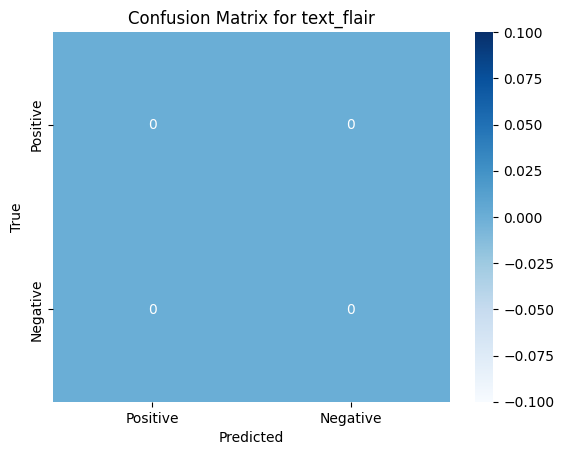

In [ ]:
# Flair Evaluation
evaluate_model('text_flair')

In [ ]:
cm_flair = confusion_matrix(cleaned_df["True_Sentiment"], cleaned_df["text_flair"], labels=['Positive', 'Negative'])
print("confusion matrix for flair\n", cm_flair)

confusion matrix for flair
 [[0 0]
 [0 0]]


3. Aggregate results

In [ ]:
# Update the get_metrics function to accept specific target labels
def get_metrics(true, pred, target_names, labels):
    report = classification_report(true, pred, output_dict=True, target_names=target_names, labels=labels)
    return {
        "Accuracy": accuracy_score(true, pred),
        "Precision": report['weighted avg']['precision'],
        "Recall": report['weighted avg']['recall'],
        "F1-Score": report['weighted avg']['f1-score'],
    }

# Define the labels for each model
vader_and_textblob_labels = ['Positive', 'Neutral', 'Negative']  # VADER and TextBlob
flair_labels = ['Positive', 'Negative']  # Flair

results = {
    "Model": ["TextBlob", "VADER", "Flair"],
    "Accuracy": [
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['text_blob_polarity'], target_names=vader_and_textblob_labels, labels=vader_and_textblob_labels)['Accuracy'],
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['overall_sentiment'], target_names=vader_and_textblob_labels, labels=vader_and_textblob_labels)['Accuracy'],
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['text_flair'], target_names=flair_labels, labels=flair_labels)['Accuracy'],
    ],
    "Precision": [
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['text_blob_polarity'], target_names=vader_and_textblob_labels, labels=vader_and_textblob_labels)['Precision'],
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['overall_sentiment'], target_names=vader_and_textblob_labels, labels=vader_and_textblob_labels)['Precision'],
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['text_flair'], target_names=flair_labels, labels=flair_labels)['Precision'],
    ],
    "Recall": [
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['text_blob_polarity'], target_names=vader_and_textblob_labels, labels=vader_and_textblob_labels)['Recall'],
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['overall_sentiment'], target_names=vader_and_textblob_labels, labels=vader_and_textblob_labels)['Recall'],
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['text_flair'], target_names=flair_labels, labels=flair_labels)['Recall'],
    ],
    "F1-Score": [
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['text_blob_polarity'], target_names=vader_and_textblob_labels, labels=vader_and_textblob_labels)['F1-Score'],
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['overall_sentiment'], target_names=vader_and_textblob_labels, labels=vader_and_textblob_labels)['F1-Score'],
        get_metrics(cleaned_df['True_Sentiment'], cleaned_df['text_flair'], target_names=flair_labels, labels=flair_labels)['F1-Score'],
    ]
}

# Create DataFrame to display the results
results_df = pd.DataFrame(results)
results_df

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

,Model,Accuracy,Precision,Recall,F1-Score
0,TextBlob,0.62502,0.935633,0.62502,0.719919
1,VADER,0.54380,0.934188,0.54380,0.651810
2,Flair,0.00000,0.000000,0.00000,0.000000


4. Visualize the evaluation metrics

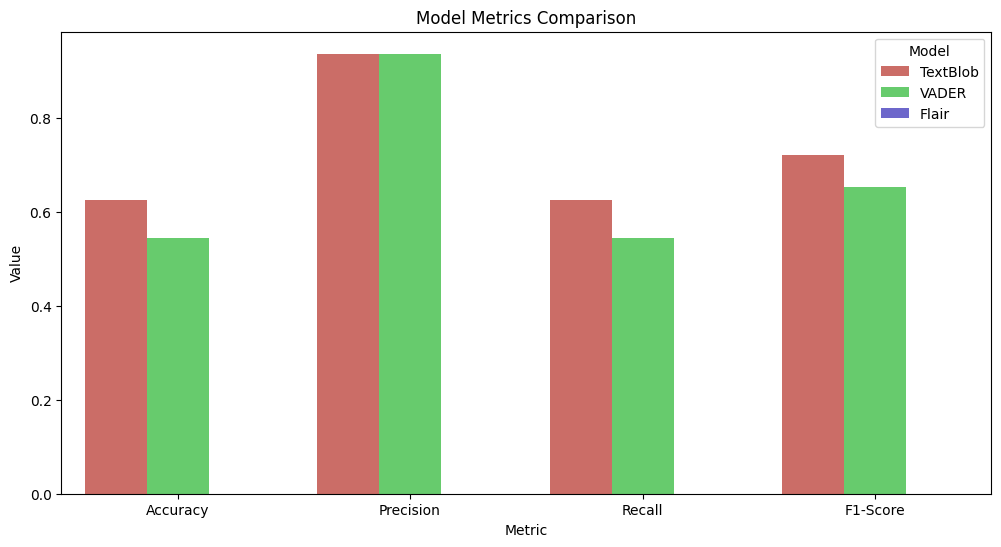

In [ ]:
# Melt the DataFrame to long format for grouped barplot
metrics_melted = results_df.melt(id_vars='Model', var_name='Metric', value_name='Value')

# Create a grouped barplot
plt.figure(figsize=(12, 6))
sns.barplot(x='Metric', y='Value', hue='Model', data=metrics_melted, palette='hls')
plt.title('Model Metrics Comparison')
plt.ylabel('Value')
plt.xlabel('Metric')
plt.legend(title='Model')
plt.show()